 Sample data:
         TV  Radio  Newspaper  Sales
171  164.5   20.9       47.4   17.5
168  215.4   23.6       57.6   17.1
66    31.5   24.6        2.2   11.0
77   120.5   28.5       14.2   14.2

 Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

 Data summary:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

 Model Evaluation Metrics:
 Root Mean Squared Error: 1.37
R² Score: 0.922


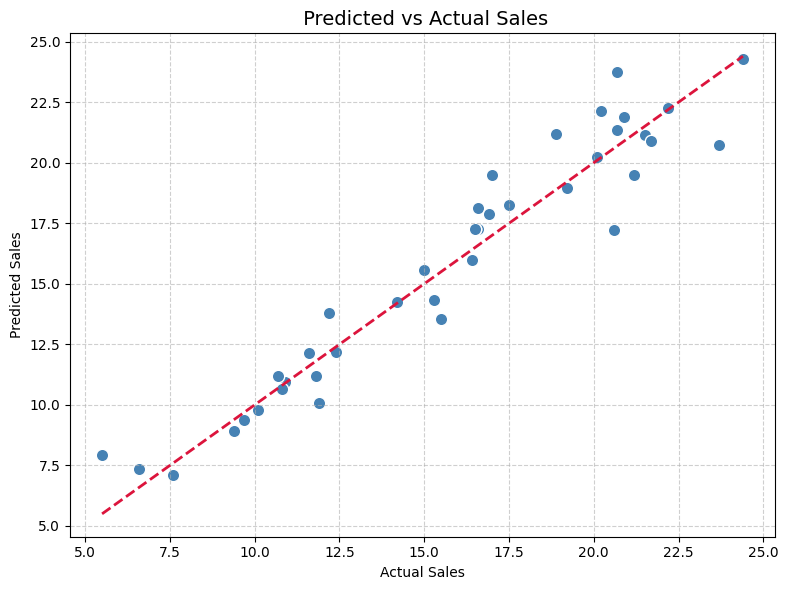

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


ads_data = pd.read_csv("advertising.csv")
print(" Sample data:\n", ads_data.sample(4))
print("\n Missing values:\n", ads_data.isnull().sum())
print("\n Data summary:\n", ads_data.describe())


features = ads_data[["TV", "Radio", "Newspaper"]]
target = ads_data["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=True, random_state=5
)


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

predicted_sales = regression_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_sales))
r2 = r2_score(y_test, predicted_sales)

print("\n Model Evaluation Metrics:")
print(f" Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_sales, color='steelblue', edgecolor='white', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'crimson', linestyle='--', linewidth=2)
plt.title(" Predicted vs Actual Sales", fontsize=14)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
